In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab as pl
from script.Plot_Induction_Figure import graficaInduccion 

# Proyecto FAA

Jorge Durán, Jaime Enríquez, Marcos de las Heras

## Pre-análisis de datos

**Metadata**:

In [2]:
sensor_m = pd.read_csv("data/HT_Sensor_metadata.dat", sep="\t")
# Correccion: cabecera de metadata mal leido
sensor_m.drop(["dt"], axis=1, inplace=True)
sensor_m.rename(columns={"t0":"dt","class":"t0", "Unnamed: 2":"class"}, inplace=True)

columns_metadata = ["id", "date", "class", "t0", "dt"]
metadata = np.loadtxt('data/HT_Sensor_metadata.dat', skiprows=1, dtype=str)
metadata_aux = np.array( metadata[:,[0,3,4]], dtype=float )

In [3]:
sensor_m.head()

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


In [4]:
sensor_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   date    100 non-null    object 
 2   class   100 non-null    object 
 3   t0      100 non-null    float64
 4   dt      100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [5]:
sensor_m.describe()

,id,t0,dt
count,100.000000,100.000000,100.000000
mean,49.500000,13.178600,0.751600
std,29.011492,4.799102,0.428424
min,0.000000,5.620000,0.120000
25%,24.750000,8.320000,0.480000
50%,49.500000,13.385000,0.620000
75%,74.250000,16.380000,0.932500
max,99.000000,23.620000,2.310000


**Dataset**:

In [6]:
sensor_d = pd.read_csv("data/HT_Sensor_dataset.dat", sep="  ", engine="python")
# Correccion: datos de dataset mal leidos
sensor_d.dropna(axis=1, inplace=True)
sensor_d.columns=["id","time", "R1","R2","R3","R4","R5","R6","R7","R8", "Temp.", "Humidity"]

columns_dataset = ["id","time", "R1","R2","R3","R4","R5","R6","R7","R8", "Temp.", "Humidity"]
dataset = np.loadtxt('data/HT_Sensor_dataset.dat', skiprows=1)

In [7]:
sensor_d.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [8]:
sensor_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928991 entries, 0 to 928990
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        928991 non-null  int64  
 1   time      928991 non-null  float64
 2   R1        928991 non-null  float64
 3   R2        928991 non-null  float64
 4   R3        928991 non-null  float64
 5   R4        928991 non-null  float64
 6   R5        928991 non-null  float64
 7   R6        928991 non-null  float64
 8   R7        928991 non-null  float64
 9   R8        928991 non-null  float64
 10  Temp.     928991 non-null  float64
 11  Humidity  928991 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 85.1 MB


In [9]:
sensor_d.describe()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


* Frecuencia cada clase en experimentos:

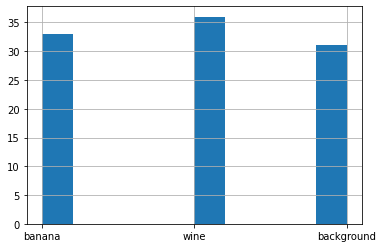

In [10]:
sensor_m["class"].hist()

* Numero de medidas tomadas en sensor_d por experimento

38    15393
32    14148
25    13441
39    13174
57    13140
      ...  
11     6526
20     6174
4      5396
14     4922
76     3825
Name: id, Length: 99, dtype: int64


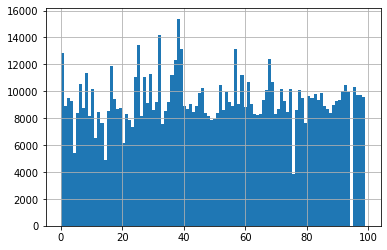

In [11]:
# Frecuencia de datos en sensor_d por experimento
print(sensor_d.id.value_counts())
sensor_d["id"].hist(bins=len(sensor_m))

* Gráficas para sensores, temperatura y humedad para cada experimento:

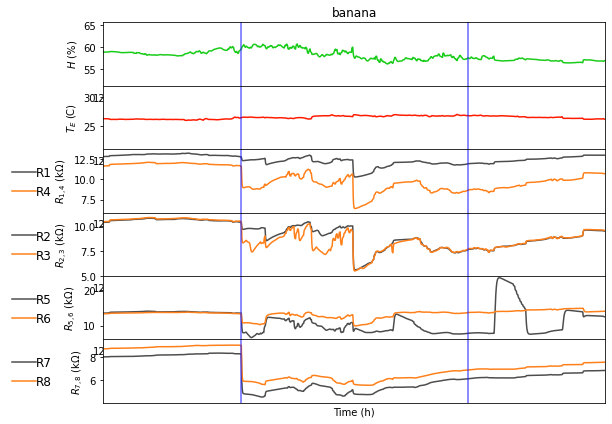

In [24]:
graficaInduccion(id=0, metadata=metadata, dataset=dataset)

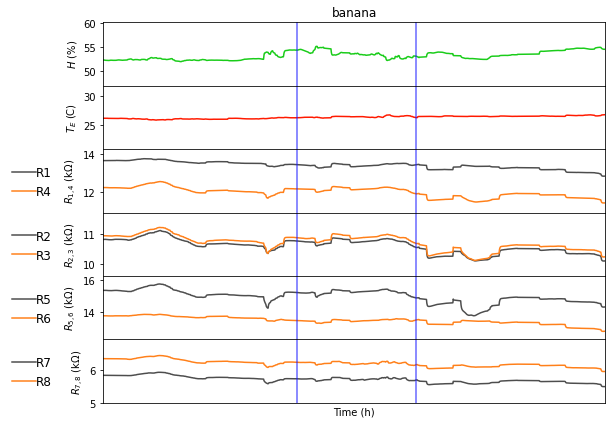

In [25]:
graficaInduccion(id=9, metadata=metadata, dataset=dataset)

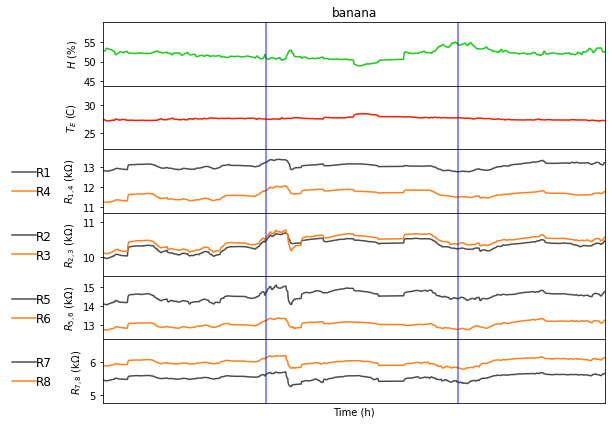

In [26]:
graficaInduccion(id=10, metadata=metadata, dataset=dataset)

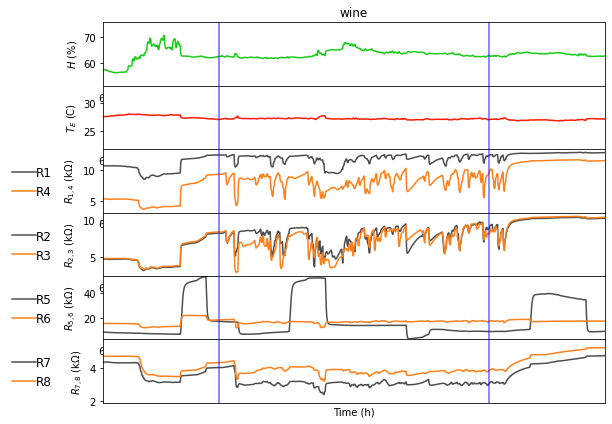

In [27]:
graficaInduccion(metadata=metadata, dataset=dataset)

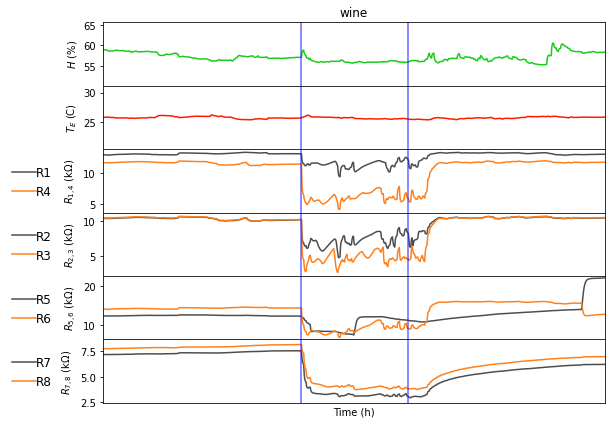

In [20]:
graficaInduccion(id=1, metadata=metadata, dataset=dataset)

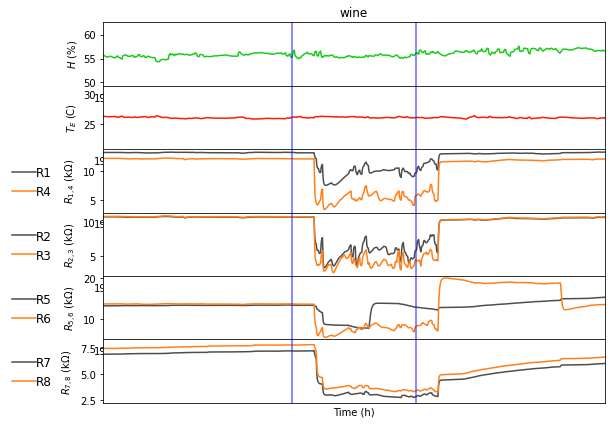

In [21]:
graficaInduccion(id=2, metadata=metadata, dataset=dataset)

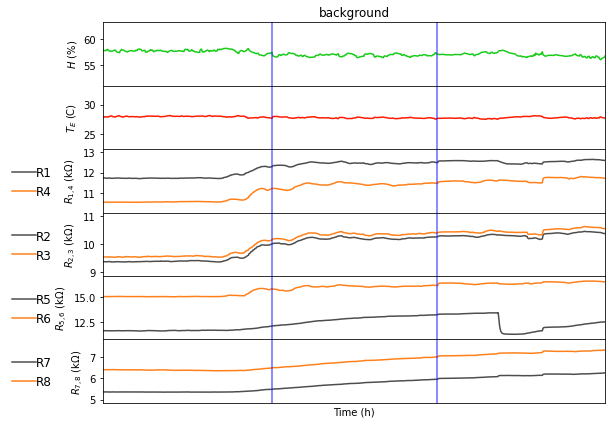

In [22]:
graficaInduccion(id=69, metadata=metadata, dataset=dataset)

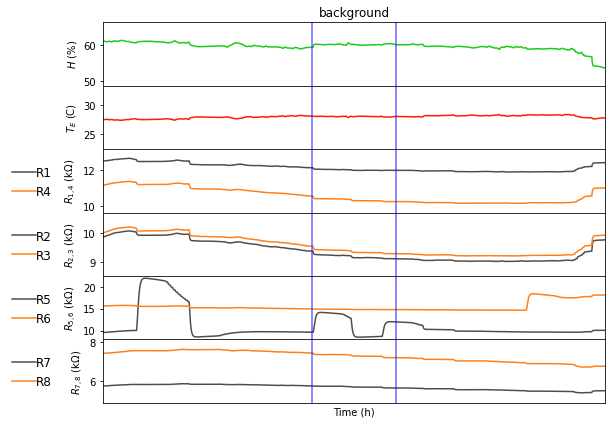

In [23]:
graficaInduccion(id=70, metadata=metadata, dataset=dataset)

* Grafica temperatura vs humedad media

In [17]:
def plotTempHum(poblacion, c):
    plt.scatter(poblacion.groupby("id")["Temp."].mean(), 
                poblacion.groupby("id")["Humidity"].mean(),
                c=c)
    plt.xlabel("Grados ºC")
    plt.ylabel("% Humidity")

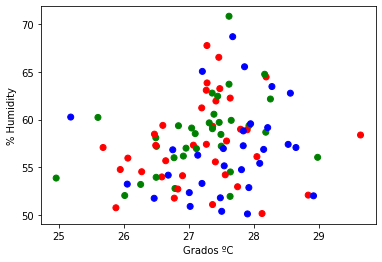

In [18]:
# Lista con colores segun clase    
color = {'wine':'r', 'banana':'g', 'background':'b'}
sensor_m_color = [color[c] for c in sensor_m["class"]]
sensor_m_color.pop(95) # Elimino caso NaN

plotTempHum(sensor_d, sensor_m_color)